# Stock Forecasting

Time Series is a collection of data points collected at constant time intervals.
It is time dependent. 
Along with an increasing or decreasing trend, most TS have some form of seasonality trends, i.e. variations specific to a particular time frame. For example, if you see the sales of a woolen jacket over time, you will invariably find higher sales in winter seasons.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Loading and Handling Time Series in Pandas

In [2]:
# load the raw data
apple = pd.read_csv("AAPL.csv")
apple.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1996-01-02,1.151786,1.151786,1.133929,1.147321,0.993233,34823600
1,1996-01-03,1.142857,1.174107,1.138393,1.147321,0.993233,107458400
2,1996-01-04,1.156250,1.156250,1.120536,1.127232,0.975842,75045600
3,1996-01-05,1.129464,1.223214,1.120536,1.223214,1.058933,111482000
4,1996-01-08,1.232143,1.267857,1.214286,1.236607,1.070527,30335200


In [3]:
# identify the data type
apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6193 entries, 0 to 6192
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6193 non-null   object 
 1   Open       6193 non-null   float64
 2   High       6193 non-null   float64
 3   Low        6193 non-null   float64
 4   Close      6193 non-null   float64
 5   Adj Close  6193 non-null   float64
 6   Volume     6193 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 338.8+ KB


# Time Series Data Structure
3 types of structures are used with TS data:
    - DatetimeIndex (mostly used)
    - PeriodIndex
    - TimedeltaIndex
Why do we need to convert the time into datetime while working with TS data?
Time series data can come in with so many different formats. But not all of those formats are friendly to python’s pandas’ library. The most convenient format is the timestamp format for Pandas. But most of the time time-series data come in string formats. That is the reason why we need to change the date type from object to timestamp.

We will make it to the DatetimeIndex format and put it as the index column.
Because when the ‘date’ column is the index column we will be able to resample it very easily. 

In [4]:
apple = pd.read_csv("AAPL.csv", parse_dates=['Date'], index_col="Date")
apple.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-07-31,411.540009,425.660004,403.299988,425.040009,425.040009,93584200
2020-08-03,432.799988,446.549988,431.570007,435.750000,435.750000,77037800
2020-08-04,436.529999,443.160004,433.549988,438.660004,438.660004,43267900
2020-08-05,437.510010,441.570007,435.589996,440.250000,440.250000,30498000
2020-08-06,441.619995,457.649994,439.190002,455.609985,455.609985,50490000


# Why is resampling important?
Because we do not always need all the data in a huge dataset. For example, we may need only the data from June 2019. 
If your date format is in DatetimeIndex, it is very easy:

In [5]:
apple['2019']

/Users/elonazharri/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  """Entry point for launching an IPython kernel.


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,154.889999,158.850006,154.229996,157.919998,154.794983,37039700
2019-01-03,143.979996,145.720001,142.000000,142.190002,139.376251,91312200
2019-01-04,144.529999,148.550003,143.800003,148.259995,145.326126,58607100
2019-01-07,148.699997,148.830002,145.899994,147.929993,145.002686,54777800
2019-01-08,149.559998,151.820007,148.520004,150.750000,147.766861,41025300
...,...,...,...,...,...,...
2019-12-24,284.690002,284.890015,282.920013,284.269989,282.831299,12119700
2019-12-26,284.820007,289.980011,284.700012,289.910004,288.442780,23280300
2019-12-27,291.119995,293.970001,288.119995,289.799988,288.333313,36566500


In [6]:
# Or we can get the data for a single day
apple.loc['2019-12-30']

Open         2.894600e+02
High         2.926900e+02
Low          2.852200e+02
Close        2.915200e+02
Adj Close    2.900446e+02
Volume       3.602860e+07
Name: 2019-12-30 00:00:00, dtype: float64

In [7]:
# Check if there is any missing data
apple.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [8]:
# dropping Close column, as we will use the Adjusted Close column for our model
apple = apple.drop('Close', axis=1)

In [9]:
apple = apple.rename(columns={"Adj Close": "Close"})

In [10]:
apple

,Open,High,Low,Close,Volume
Date,,,,,
1996-01-02,1.151786,1.151786,1.133929,0.993233,34823600
1996-01-03,1.142857,1.174107,1.138393,0.993233,107458400
1996-01-04,1.156250,1.156250,1.120536,0.975842,75045600
1996-01-05,1.129464,1.223214,1.120536,1.058933,111482000
1996-01-08,1.232143,1.267857,1.214286,1.070527,30335200
...,...,...,...,...,...
2020-07-31,411.540009,425.660004,403.299988,425.040009,93584200
2020-08-03,432.799988,446.549988,431.570007,435.750000,77037800
2020-08-04,436.529999,443.160004,433.549988,438.660004,43267900


In [11]:
# Call the .corr() method on the apple dataset to view the relationships among the features of the dataset
apple.corr()

,Open,High,Low,Close,Volume
Open,1.000000,0.999920,0.999916,0.998900,-0.359337
High,0.999920,1.000000,0.999868,0.999056,-0.357955
Low,0.999916,0.999868,1.000000,0.998961,-0.361110
Close,0.998900,0.999056,0.998961,1.000000,-0.360740
Volume,-0.359337,-0.357955,-0.361110,-0.360740,1.000000


# How to Check Stationarity of our TS data?

We can check stationarity using the following:
- Plotting Rolling Statistics: We can plot the moving average or moving variance and see if it varies with time. By moving average/variance I mean that at any instant ‘t’, we’ll take the average/variance of the last year, i.e. last 12 months.

- Dickey-Fuller Test: This is one of the statistical tests for checking stationarity. Here the null hypothesis is that the TS is non-stationary. The test results comprise of a Test Statistic and some Critical Values for difference confidence levels. If the ‘Test Statistic’ is less than the ‘Critical Value’, we can reject the null hypothesis and say that the series is stationary.

## Plotting Rolling Statistics:

In [12]:
rolmean = apple['Close'].rolling(window=12).mean()
rolstd = apple['Close'].rolling(window=12).std()
print(rolmean, rolstd)

Date
1996-01-02           NaN
1996-01-03           NaN
1996-01-04           NaN
1996-01-05           NaN
1996-01-08           NaN
                 ...    
2020-07-31    385.497500
2020-08-03    389.635834
2020-08-04    394.081668
2020-08-05    397.983335
2020-08-06    403.617500
Name: Close, Length: 6193, dtype: float64 Date
1996-01-02          NaN
1996-01-03          NaN
1996-01-04          NaN
1996-01-05          NaN
1996-01-08          NaN
                ...    
2020-07-31    14.446283
2020-08-03    20.483029
2020-08-04    24.794740
2020-08-05    28.140854
2020-08-06    32.405418
Name: Close, Length: 6193, dtype: float64


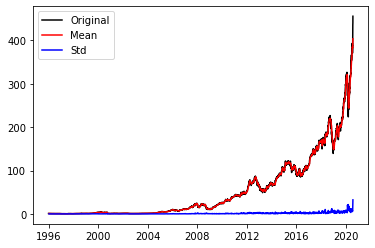

In [13]:
orig = plt.plot(apple['Close'], color='black', label='Original')
mean = plt.plot(rolmean, color='red', label='Mean')
std = plt.plot(rolstd, color='blue', label='Std')
plt.legend(loc='best')
plt.title = ("Rolling mean and STD")
plt.show(block=False)

## Dickey-Fuller Test:

In [14]:
# checking the stationarity of the data by using adfuller test
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
test_stationarity(apple['Close'])

Results of Dickey-Fuller Test:
Test Statistic                    5.150154
p-value                           1.000000
#Lags Used                       34.000000
Number of Observations Used    6158.000000
Critical Value (1%)              -3.431412
Critical Value (5%)              -2.862009
Critical Value (10%)             -2.567020
dtype: float64


Null hypothesis in ADF test is that Data is not stationary. 
- if Test Statistic < Critical Values => Rejects the null hypothesis.
- if Test Statistic >Critical Values => failed to reject the null hypothesis.

From the results of Dickey-Fuller Test, the p-value is not less than 5%, so we can not reject the null hypothesis that the series is a random walk.
As we know that a random walk is a non-stationary series, our next step is to make the series stationary.

# Estimating & Eliminating Trend

One of the first tricks to reduce trend can be transformation. For example, in this case we can clearly see that the there is an exponential growth and significant positive trend. So we can apply transformation which penalize higher values more than smaller values. These can be taking a log, square root, cube root, etc. 
We can first take the differences and than take a log transform to bring the data close to stationarity.

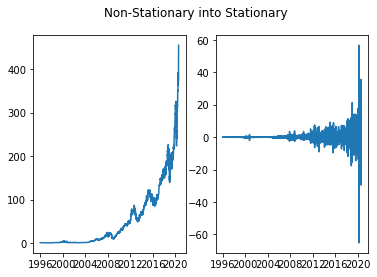

In [15]:
# Calculating and visualizing the difference
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Non-Stationary into Stationary')
# apple data as a non-stationary random walk
ax1.plot(apple['Close'])
# by computing the first differences, it becomes a stationary white noise process
ax2.plot(apple['Close'].diff().diff())
plt.show()

So we can use some techniques to estimate or model this trend and then remove it from the series. There can be many ways of doing it and some of most commonly used are:

- Aggregation – taking average for a time period like monthly/weekly averages
- Smoothing – taking rolling averages
- Polynomial Fitting – fit a regression model

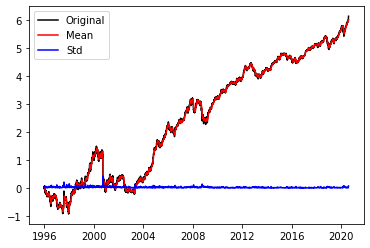

Results of Dicky-Fuller Test:
Test Statistic                    0.070866
p-value                           0.964015
#Lags Used                       22.000000
Number of Observations Used    6170.000000
Critical Value(1%                -3.431410
Critical Value(5%                -2.862009
Critical Value(10%               -2.567019
dtype: float64


In [16]:
# Taking the log
appleLogScale = np.log(apple['Close'])

# Smoothing the data
# Here we can take the average over the past 1 year, i.e. last 12 values.
moving_avg = appleLogScale.rolling(window = 12).mean()
movingSTD = appleLogScale.rolling(window=12).std()
orig = plt.plot(appleLogScale , color='black', label='Original')
mean = plt.plot(moving_avg, color='red', label='Mean')
std = plt.plot(movingSTD, color='blue', label='Std')
plt.legend(loc='best')
plt.title = ("Rolling mean and STD")
plt.show(block=False)


from statsmodels.tsa.stattools import adfuller

print("Results of Dicky-Fuller Test:")
dftest = adfuller(appleLogScale, autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value(%s' %key] = value
    
print(dfoutput)

By taking only the log of the series we simply eliminate the exponatial growth. Applying the difference and the log at the same time, the transformed series looks stationary.

In [17]:
appleLogScaleMinusMA = appleLogScale - moving_avg
appleLogScaleMinusMA.dropna(inplace=True)

In [18]:
appleLogScaleMinusMA.head(12)

Date
1996-01-17    0.012254
1996-01-18   -0.049838
1996-01-19   -0.110546
1996-01-22   -0.086987
1996-01-23   -0.044121
1996-01-24   -0.018629
1996-01-25   -0.076034
1996-01-26   -0.054392
1996-01-29   -0.089298
1996-01-30   -0.135607
1996-01-31   -0.106621
1996-02-01   -0.063395
Name: Close, dtype: float64

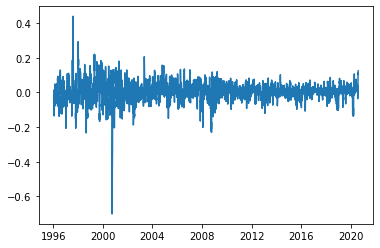

In [19]:
plt.plot(appleLogScaleMinusMA)
plt.show()

In [20]:
test_stationarity(appleLogScaleMinusMA)

Results of Dickey-Fuller Test:
Test Statistic                -1.614457e+01
p-value                        4.637799e-29
#Lags Used                     1.700000e+01
Number of Observations Used    6.164000e+03
Critical Value (1%)           -3.431411e+00
Critical Value (5%)           -2.862009e+00
Critical Value (10%)          -2.567020e+00
dtype: float64


This looks like a much better series.
However, a drawback in this particular approach is that the time-period has to be strictly defined. In this case we can take yearly averages but in complex situations like forecasting a stock price, its difficult to come up with a number. So we take a ‘weighted moving average’ where more recent values are given a higher weight. There can be many technique for assigning weights. A popular one is exponentially weighted moving average where weights are assigned to all the previous values with a decay factor.

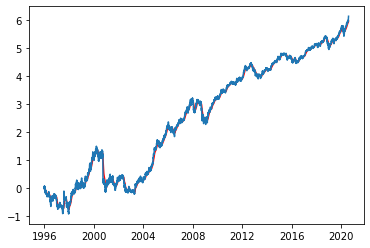

In [21]:
exponentialWeightedAVG = appleLogScale.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(exponentialWeightedAVG,  color='red')
plt.plot(appleLogScale)

In [22]:
# Save it on the dataframe 
appleLogScaleMinusMovingEWA = appleLogScale - exponentialWeightedAVG
test_stationarity(appleLogScaleMinusMovingEWA)

Results of Dickey-Fuller Test:
Test Statistic                -9.936328e+00
p-value                        2.737526e-17
#Lags Used                     2.200000e+01
Number of Observations Used    6.170000e+03
Critical Value (1%)           -3.431410e+00
Critical Value (5%)           -2.862009e+00
Critical Value (10%)          -2.567019e+00
dtype: float64


In [23]:
apple['Close']=appleLogScaleMinusMovingEWA

In [24]:
#appleLogScaleMinusMovingEWA.head()
apple

,Open,High,Low,Close,Volume
Date,,,,,
1996-01-02,1.151786,1.151786,1.133929,0.000000,34823600
1996-01-03,1.142857,1.174107,1.138393,0.000000,107458400
1996-01-04,1.156250,1.156250,1.120536,-0.011433,75045600
1996-01-05,1.129464,1.223214,1.120536,0.051162,111482000
1996-01-08,1.232143,1.267857,1.214286,0.048168,30335200
...,...,...,...,...,...
2020-07-31,411.540009,425.660004,403.299988,0.139794,93584200
2020-08-03,432.799988,446.549988,431.570007,0.155437,77037800
2020-08-04,436.529999,443.160004,433.549988,0.152995,43267900


# Plotting ACF and PACF

The next step is to determine the tuning parameters of the model by looking at the autocorrelation and partial autocorrelation graphs.

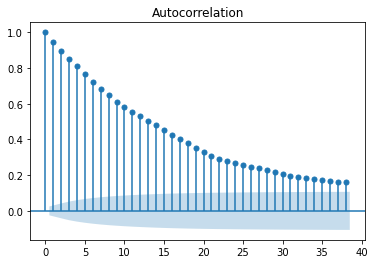

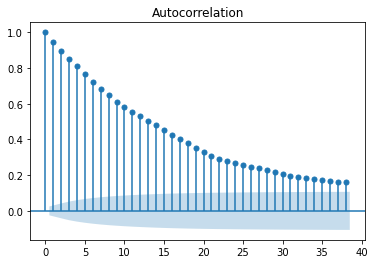

In [25]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
plot_acf(apple['Close'])

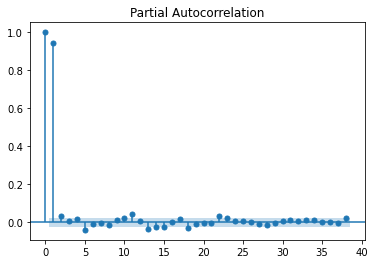

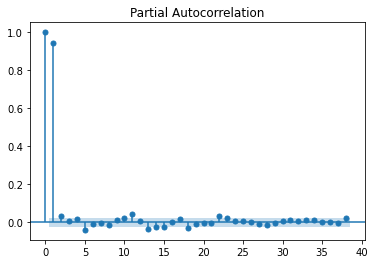

In [26]:
plot_pacf(apple['Close'])

# Feature engineering

## Moving Average Cross Strategy

In [27]:
import datetime
from tabulate import tabulate
import warnings
warnings.filterwarnings('ignore')

def MovingAverage(df, start_date = '1996-01-02', end_date = '2020-08-06', 
                               short_window = 20, long_window = 50, moving_avg = 'SMA'):
    '''
    The function takes the dataset, time-duration of analysis, 
    look-back periods and the moving-average type(SMA or EMA) as input 
    and returns the respective MA Crossover chart along with the buy/sell signals for the given period.
    '''
    
    # start_date - (str)start analysis from this date (format: 'YYYY-MM-DD') Eg: '2018-01-01'
    # end_date - (str)end analysis on this date (format: 'YYYY-MM-DD') Eg: '2020-01-01'
    # short_window - (int)lookback period for short-term moving average. Eg: 5, 10, 20 
    # long_window - (int)lookback period for long-term moving average. Eg: 50, 100, 200
    # moving_avg - (str)the type of moving average to use ('SMA' or 'EMA')
    # display_table - (bool)whether to display the date and price table at buy/sell positions(True/False)
    
    
    #df['Close'] = df.loc[start_date:end_date,'Close'] # assign new colun name
    df.dropna(axis = 0, inplace = True) # remove any null rows 
    
    # column names for long and short moving average columns
    short_window_col = str(short_window) + '_' + moving_avg
    long_window_col = str(long_window) + '_' + moving_avg  
  
    if moving_avg == 'SMA':
        # Create a short simple moving average column
        df[short_window_col] = df['Close'].rolling(window = short_window, min_periods = 1).mean()

        # Create a long simple moving average column
        df[long_window_col] = df['Close'].rolling(window = long_window, min_periods = 1).mean()

    elif moving_avg == 'EMA':
        # Create short exponential moving average column
        df[short_window_col] = df['Close'].ewm(span = short_window, adjust = False).mean()

        # Create a long exponential moving average column
        df[long_window_col] = df['Close'].ewm(span = long_window, adjust = False).mean()

In [28]:
MovingAverage(apple)

In [29]:
apple 

,Open,High,Low,Close,Volume,20_SMA,50_SMA
Date,,,,,,,
1996-01-02,1.151786,1.151786,1.133929,0.000000,34823600,0.000000,0.000000
1996-01-03,1.142857,1.174107,1.138393,0.000000,107458400,0.000000,0.000000
1996-01-04,1.156250,1.156250,1.120536,-0.011433,75045600,-0.003811,-0.003811
1996-01-05,1.129464,1.223214,1.120536,0.051162,111482000,0.009932,0.009932
1996-01-08,1.232143,1.267857,1.214286,0.048168,30335200,0.017579,0.017579
...,...,...,...,...,...,...,...
2020-07-31,411.540009,425.660004,403.299988,0.139794,93584200,0.074798,0.079375
2020-08-03,432.799988,446.549988,431.570007,0.155437,77037800,0.077831,0.080935
2020-08-04,436.529999,443.160004,433.549988,0.152995,43267900,0.081154,0.082413


# MACD - Moving Average Convergence Divergence

In [30]:
# MACD Calculation
def get_macd(df, slow=26, fast=12, smooth=9, start_date = '1996-01-02', end_date = '2020-08-06',):
    
    # isolate the closing price
    closingPrice = df.loc[start_date:end_date,'Close']
    
    exp1 = closingPrice.ewm(span = fast, adjust = False).mean()
    exp2 = closingPrice.ewm(span = slow, adjust = False).mean()
    macd = pd.DataFrame(exp1 - exp2).rename(columns = {'Close':'MACD'})
    signal = pd.DataFrame(macd.ewm(span = smooth, adjust = False).mean()).rename(columns = {'MACD':'MACD_Signal'})
    hist = pd.DataFrame(macd['MACD'] - signal['MACD_Signal']).rename(columns = {0:'Hist'})
    frames =  [macd, signal, hist]
    df = pd.concat(frames, join = 'inner', axis = 1)
    return df

get_macd(apple)
# Drop the histogram column

,MACD,MACD_Signal,Hist
Date,,,
1996-01-02,0.000000,0.000000,0.000000
1996-01-03,0.000000,0.000000,0.000000
1996-01-04,-0.000912,-0.000182,-0.000730
1996-01-05,0.003377,0.000529,0.002848
1996-01-08,0.006460,0.001716,0.004745
...,...,...,...
2020-07-31,-0.005215,-0.007642,0.002428
2020-08-03,0.002279,-0.005658,0.007937
2020-08-04,0.007929,-0.002941,0.010870


In [31]:
apple= pd.concat([apple,get_macd(apple)], axis=1)

In [32]:
apple.drop(['Hist'], axis=1, inplace=True)

In [33]:
apple

,Open,High,Low,Close,Volume,20_SMA,50_SMA,MACD,MACD_Signal
Date,,,,,,,,,
1996-01-02,1.151786,1.151786,1.133929,0.000000,34823600,0.000000,0.000000,0.000000,0.000000
1996-01-03,1.142857,1.174107,1.138393,0.000000,107458400,0.000000,0.000000,0.000000,0.000000
1996-01-04,1.156250,1.156250,1.120536,-0.011433,75045600,-0.003811,-0.003811,-0.000912,-0.000182
1996-01-05,1.129464,1.223214,1.120536,0.051162,111482000,0.009932,0.009932,0.003377,0.000529
1996-01-08,1.232143,1.267857,1.214286,0.048168,30335200,0.017579,0.017579,0.006460,0.001716
...,...,...,...,...,...,...,...,...,...
2020-07-31,411.540009,425.660004,403.299988,0.139794,93584200,0.074798,0.079375,-0.005215,-0.007642
2020-08-03,432.799988,446.549988,431.570007,0.155437,77037800,0.077831,0.080935,0.002279,-0.005658
2020-08-04,436.529999,443.160004,433.549988,0.152995,43267900,0.081154,0.082413,0.007929,-0.002941


# RSI 

In [34]:
# calculating RSI
def get_rsi(close, lookback):
    ret = close.diff()
    up = []
    down = []
    for i in range(len(ret)):
        if ret[i] < 0:
            up.append(0)
            down.append(ret[i])
        else:
            up.append(ret[i])
            down.append(0)
    up_series = pd.Series(up)
    down_series = pd.Series(down).abs()
    up_ewm = up_series.ewm(com = lookback - 1, adjust = False).mean()
    down_ewm = down_series.ewm(com = lookback - 1, adjust = False).mean()
    rs = up_ewm/down_ewm
    rsi = 100 - (100 / (1 + rs))
    rsi_df = pd.DataFrame(rsi).rename(columns = {0:'rsi'}).set_index(close.index)
    rsi_df = rsi_df.dropna()
    return rsi_df[3:]

apple['RSI_14'] = get_rsi(apple['Close'], 14)
apple = apple.dropna()
apple

,Open,High,Low,Close,Volume,20_SMA,50_SMA,MACD,MACD_Signal,RSI_14
Date,,,,,,,,,,
1996-01-09,1.236607,1.236607,1.169643,-0.006067,62804000,0.013638,0.013638,0.004476,0.002268,44.924155
1996-01-10,1.160714,1.241071,1.151786,0.032183,91358400,0.016287,0.016287,0.005921,0.002998,58.986142
1996-01-11,1.165179,1.250000,1.156250,0.045678,189184800,0.019961,0.019961,0.008063,0.004011,62.613131
1996-01-12,1.241071,1.241071,1.187500,0.011206,100464000,0.018988,0.018988,0.006899,0.004589,50.361696
1996-01-15,1.205357,1.232143,1.191964,0.016185,90770400,0.018708,0.018708,0.006305,0.004932,51.827974
...,...,...,...,...,...,...,...,...,...,...
2020-07-31,411.540009,425.660004,403.299988,0.139794,93584200,0.074798,0.079375,-0.005215,-0.007642,63.513921
2020-08-03,432.799988,446.549988,431.570007,0.155437,77037800,0.077831,0.080935,0.002279,-0.005658,65.648580
2020-08-04,436.529999,443.160004,433.549988,0.152995,43267900,0.081154,0.082413,0.007929,-0.002941,65.009243


In [35]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6188 entries, 1996-01-09 to 2020-08-06
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Open         6188 non-null   float64
 1   High         6188 non-null   float64
 2   Low          6188 non-null   float64
 3   Close        6188 non-null   float64
 4   Volume       6188 non-null   int64  
 5   20_SMA       6188 non-null   float64
 6   50_SMA       6188 non-null   float64
 7   MACD         6188 non-null   float64
 8   MACD_Signal  6188 non-null   float64
 9   RSI_14       6188 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 531.8 KB


# Bollinger Band

In [36]:
def BollingerBand(data, sma, window):
    std = data.rolling(window = window).std()
    upper_bb = sma + std * 2
    lower_bb = sma - std * 2
    return upper_bb, lower_bb

In [37]:
apple['Upper_BB'], apple['Lower_BB'] = BollingerBand(apple['Close'], apple['20_SMA'], 20)

In [38]:
apple.dropna(inplace=True)

In [39]:
apple

,Open,High,Low,Close,Volume,20_SMA,50_SMA,MACD,MACD_Signal,RSI_14,Upper_BB,Lower_BB
Date,,,,,,,,,,,,
1996-02-05,1.060268,1.062500,1.035714,-0.051980,79682400,-0.041878,-0.029986,-0.022839,-0.021595,48.650292,0.068791,-0.152546
1996-02-06,1.044643,1.071429,1.044643,-0.036407,56554400,-0.043395,-0.030233,-0.018700,-0.021016,50.968288,0.066032,-0.152821
1996-02-07,1.062500,1.062500,0.991071,-0.077967,90081600,-0.048902,-0.032001,-0.018559,-0.020524,45.115265,0.055479,-0.153284
1996-02-08,0.982143,1.004464,0.982143,-0.084936,65791600,-0.055433,-0.033892,-0.018793,-0.020178,44.198809,0.039993,-0.150858
1996-02-09,0.995536,1.017857,0.986607,-0.083254,51422000,-0.060156,-0.035594,-0.018628,-0.019868,44.491806,0.030620,-0.150931
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-31,411.540009,425.660004,403.299988,0.139794,93584200,0.074798,0.079375,-0.005215,-0.007642,63.513921,0.139645,0.009951
2020-08-03,432.799988,446.549988,431.570007,0.155437,77037800,0.077831,0.080935,0.002279,-0.005658,65.648580,0.151664,0.003998
2020-08-04,436.529999,443.160004,433.549988,0.152995,43267900,0.081154,0.082413,0.007929,-0.002941,65.009243,0.162261,0.000047


In [40]:
apple.drop(['Open', 'High','Low','Volume'], axis=1, inplace=True)

In [41]:
apple

,Close,20_SMA,50_SMA,MACD,MACD_Signal,RSI_14,Upper_BB,Lower_BB
Date,,,,,,,,
1996-02-05,-0.051980,-0.041878,-0.029986,-0.022839,-0.021595,48.650292,0.068791,-0.152546
1996-02-06,-0.036407,-0.043395,-0.030233,-0.018700,-0.021016,50.968288,0.066032,-0.152821
1996-02-07,-0.077967,-0.048902,-0.032001,-0.018559,-0.020524,45.115265,0.055479,-0.153284
1996-02-08,-0.084936,-0.055433,-0.033892,-0.018793,-0.020178,44.198809,0.039993,-0.150858
1996-02-09,-0.083254,-0.060156,-0.035594,-0.018628,-0.019868,44.491806,0.030620,-0.150931
...,...,...,...,...,...,...,...,...
2020-07-31,0.139794,0.074798,0.079375,-0.005215,-0.007642,63.513921,0.139645,0.009951
2020-08-03,0.155437,0.077831,0.080935,0.002279,-0.005658,65.648580,0.151664,0.003998
2020-08-04,0.152995,0.081154,0.082413,0.007929,-0.002941,65.009243,0.162261,0.000047


In [42]:
apple.corr()

,Close,20_SMA,50_SMA,MACD,MACD_Signal,RSI_14,Upper_BB,Lower_BB
Close,1.000000,0.742270,0.525811,0.688289,0.635860,0.561128,0.499967,0.683203
20_SMA,0.742270,1.000000,0.800295,0.266548,0.462396,-0.004644,0.742595,0.869517
50_SMA,0.525811,0.800295,1.000000,-0.161597,-0.076836,-0.195040,0.588250,0.700328
MACD,0.688289,0.266548,-0.161597,1.000000,0.915846,0.677033,0.148050,0.268558
MACD_Signal,0.635860,0.462396,-0.076836,0.915846,1.000000,0.458602,0.321117,0.418474
RSI_14,0.561128,-0.004644,-0.195040,0.677033,0.458602,1.000000,-0.013000,0.003006
Upper_BB,0.499967,0.742595,0.588250,0.148050,0.321117,-0.013000,1.000000,0.314912
Lower_BB,0.683203,0.869517,0.700328,0.268558,0.418474,0.003006,0.314912,1.000000


# Scaling and splitting the data

In [43]:
# Use time series split, not random 25%, it will use the last 25% of the data

In [44]:
# First Attempt in Slitting the data

In [45]:
from sklearn.model_selection import TimeSeriesSplit
X = apple.loc[:,apple.columns !=  'Close']
y = apple['Close']
cv = TimeSeriesSplit(n_splits=3)

In [46]:
type(X)

pandas.core.frame.DataFrame

In [47]:
for train_index, test_index in cv.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

TRAIN: [   0    1    2 ... 1540 1541 1542] TEST: [1543 1544 1545 ... 3082 3083 3084]
TRAIN: [   0    1    2 ... 3082 3083 3084] TEST: [3085 3086 3087 ... 4624 4625 4626]
TRAIN: [   0    1    2 ... 4624 4625 4626] TEST: [4627 4628 4629 ... 6166 6167 6168]


In [48]:
# Split into train and test data
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
#train_X, test_X, train_y,test_y = train_test_split(X,y,test_size=0.25, random_state=42)

In [49]:
# We now want to check the shape of the X train, y_train, X_test and y_test to make sure the proportions are right. 
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(4627, 7) (4627,)
(1542, 7) (1542,)


# Build Model

In [50]:
#Creating the Regressor
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

# Make Predictions

In [96]:
#Make Predictions and Evaluate the results
predict_y = regressor.predict(X_test)
print('Prediction Score : ' , regressor.score(X_test,y_test))
print('Mean Squared Error : ',mean_squared_error(y_test,predict_y))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

Prediction Score :  0.04821159145879905
Mean Squared Error :  0.0023107109824894727
Root Mean Squared Error: 0.012288468392527719


In [52]:
# Order the data by the date
new_df=X_test.merge(y_test, left_index=True, right_index=True)

In [81]:
new_df['Predition'] = predict_y
new_df

,20_SMA,50_SMA,MACD,MACD_Signal,RSI_14,Upper_BB,Lower_BB,Close,Predition
Date,,,,,,,,,
2014-06-24,0.060441,0.054333,-0.008920,-0.002265,32.509123,0.105195,0.015687,0.017336,-0.099029
2014-06-25,0.057688,0.055026,-0.010335,-0.003879,32.464659,0.106013,0.009363,0.017199,-0.099853
2014-06-26,0.054519,0.055927,-0.010955,-0.005294,35.692568,0.103542,0.005495,0.021858,-0.075843
2014-06-27,0.052261,0.056962,-0.010524,-0.006340,42.045573,0.101099,0.003424,0.031779,-0.036009
2014-06-30,0.050941,0.057919,-0.009435,-0.006959,46.579609,0.099631,0.002251,0.039694,-0.011247
...,...,...,...,...,...,...,...,...,...
2020-07-31,0.074798,0.079375,-0.005215,-0.007642,63.513921,0.139645,0.009951,0.139794,0.102305
2020-08-03,0.077831,0.080935,0.002279,-0.005658,65.648580,0.151664,0.003998,0.155437,0.120807
2020-08-04,0.081154,0.082413,0.007929,-0.002941,65.009243,0.162261,0.000047,0.152995,0.115689


In [56]:
new_df.sort_index(inplace=True)

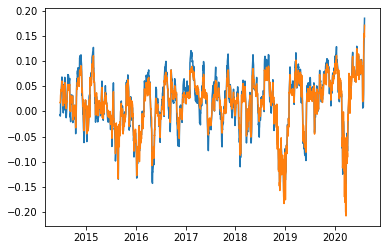

In [57]:
#Plot the predicted and the expected values as scatterplot
fig = plt.figure()
plt.plot(new_df.index,new_df['Predition'])
plt.plot(new_df.index,new_df['Close'])
plt.show()

# Random Forest

In [107]:
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [108]:
# Use the forest's predict method on the test data
predictions = rf.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
print('Mean Squared Error:', mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, predictions)))

Mean Absolute Error: 0.01 degrees.
Mean Squared Error: 0.00013290263212934524
Root Mean Squared Error: 0.011528340389203697


# SVM

In [61]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

SVR()

In [62]:
y_pred = regressor.predict(X_test)
#y_pred = y.inverse_transform(y_pred) 
print(y_pred)

[-0.09902869 -0.09985332 -0.07584286 ...  0.11568916  0.1040928
  0.13551982]


In [84]:
score = regressor.score(X_train,y_train)
print("R-squared:", score)
print("MSE:", mean_squared_error(y_test,y_pred))
print("Root-mean-squared-error:",np.sqrt(mean_squared_error(y_test,y_pred)))

R-squared: 0.5165197437684835
MSE: 0.00013614606977148679
Root-mean-squared-error: 0.011668164798779917


# Gradient Boosted Trees

In [90]:
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error

In [91]:
params = {'n_estimators': 1000,
          'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}

In [92]:
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)
score = reg.score(X_train,y_train)
mse = mean_squared_error(y_test, reg.predict(X_test))
print("R-squared:", score)
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
print("Root-mean-squared-error:",np.sqrt(mse))

R-squared: 0.991234160803931
The mean squared error (MSE) on test set: 0.0002
Root-mean-squared-error: 0.012288468392527719


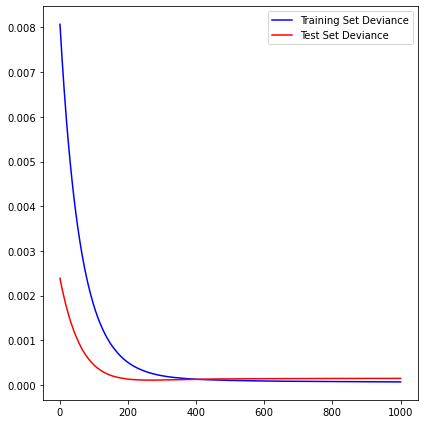

In [93]:
# Plot training deviance

test_score = np.zeros((params['n_estimators'],), dtype=np.float64)
for i, y_pred in enumerate(reg.staged_predict(X_test)):
    test_score[i] = reg.loss_(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
#plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, reg.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
#plt.xlabel('Boosting Iterations')
#plt.ylabel('Deviance')
fig.tight_layout()
plt.show()

In [94]:
# evaluate gradient boosting ensemble for regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import GradientBoostingRegressor
# define dataset
X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=7)
# define the model
model = GradientBoostingRegressor()
# define the evaluation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model
n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# report performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: -62.461 (3.245)


In [95]:
# gradient boosting ensemble for making predictions for regression
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
# define dataset
X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=7)
# define the model
model = GradientBoostingRegressor()
# fit the model on the whole dataset
model.fit(X, y)
# make a single prediction
row = [0.20543991, -0.97049844, -0.81403429, -0.23842689, -0.60704084, -0.48541492, 0.53113006, 2.01834338, -0.90745243, -1.85859731, -1.02334791, -0.6877744, 0.60984819, -0.70630121, -1.29161497, 1.32385441, 1.42150747, 1.26567231, 2.56569098, -0.11154792]
yhat = model.predict([row])
# summarize prediction
print('Prediction: %d' % yhat[0])

Prediction: 37


In [ ]:
# Optimizing (grid search cv, modify the hyper parameters)
# pick the fav model (based on the score)

In [ ]:
# I have picked Random Forest

In [109]:
from pprint import pprint
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1000,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [110]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [100]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [103]:
rf_random.best_params_

{'n_estimators': 1800,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': None,
 'bootstrap': True}

In [115]:
def evaluate(model, X_test, y_test):
    predictions = model.predict(X_test)
    errors = abs(predictions - y_test)
    mse = mean_squared_error(y_test, predictions)
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('MSE = {:0.2f}%.'.format(mse))
    
    return mse

base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_train, y_train)
base_mse = evaluate(base_model, X_test, y_test)

best_random = rf_random.best_estimator_
random_mse = evaluate(best_random, X_test, y_test)

print('Improvement of {:0.2f}%.'.format( 100 * (base_mse - random_mse) / base_mse))


Model Performance
Average Error: 0.0077 degrees.
MSE = 0.00%.
Model Performance
Average Error: 0.0073 degrees.
MSE = 0.00%.
Improvement of 0.76%.


In [120]:
# Grid Search CV
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {'n_estimators': [1400,1600, 1800, 2000],
 'min_samples_split':[2] ,
 'min_samples_leaf': [2],
 'max_features': ['auto'],
 'max_depth': [None],
 'bootstrap': [True]}
# Create a based model
rf = RandomForestRegressor(random_state=42)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [121]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 4 candidates, totalling 12 fits


{'bootstrap': True,
 'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 2000}

In [122]:
best_grid = grid_search.best_estimator_
grid_mse = evaluate(best_grid, X_test, y_test)

print('Improvement of {:0.2f}%.'.format( 100 * (base_mse - grid_mse) / base_mse))

Model Performance
Average Error: 0.0072 degrees.
MSE = 0.00%.
Improvement of 4.44%.


In [ ]:
# do the visualization for all the algorithms and the main grid

In [ ]:
# summary